In [3]:
import os
import numpy as np
import nibabel as nib
from matplotlib import pyplot as plt
from ipywidgets import interactive, fixed

In [16]:
zhaog_path = '/data/users/cyang/acute_pancreatitis/unprocess/nii/liuhui'


nii_name = '2023_3_31_MR_RTr_Ax_DWI_1500_Shim_20230331174513_6.nii.gz'
nii_name = '2023_3_31_MR_FAT__BH_Ax_LAVA-FlexMASK_20230331174513_1000.nii.gz'

example_filename = os.path.join(zhaog_path, nii_name)

img = nib.load(example_filename)

img_get_fdata = img.get_fdata()

In [17]:
%ls /data/users/cyang/acute_pancreatitis/unprocess/nii/liuhui/

2023_3_31_MR_3-Pl_Loc_SSFSE_20230331174513_2_i00001.json
2023_3_31_MR_3-Pl_Loc_SSFSE_20230331174513_2_i00001.nii.gz
2023_3_31_MR_3-Pl_Loc_SSFSE_20230331174513_2_i00004.json
2023_3_31_MR_3-Pl_Loc_SSFSE_20230331174513_2_i00004.nii.gz
2023_3_31_MR_3-Pl_Loc_SSFSE_20230331174513_2_i00005.json
2023_3_31_MR_3-Pl_Loc_SSFSE_20230331174513_2_i00005.nii.gz
2023_3_31_MR_Apparent_Diffusion_Coefficient_(mm2_s)_20230331174513_501.json
2023_3_31_MR_Apparent_Diffusion_Coefficient_(mm2_s)_20230331174513_501.nii.gz
2023_3_31_MR_Apparent_Diffusion_Coefficient_(mm2_s)_20230331174513_601.json
2023_3_31_MR_Apparent_Diffusion_Coefficient_(mm2_s)_20230331174513_601.nii.gz
2023_3_31_MR_Apparent_Diffusion_Coefficient_(mm2_s)_20230331174513_901.json
2023_3_31_MR_Apparent_Diffusion_Coefficient_(mm2_s)_20230331174513_901.nii.gz
2023_3_31_MR_Exponential_Apparent_Diffusion_Coefficient_20230331174513_502.json
2023_3_31_MR_Exponential_Apparent_Diffusion_Coefficient_20230331174513_502.nii.gz
2023_3_31_MR_Exponential_App

In [18]:
img.shape

(512, 512, 44, 2)

In [19]:
header_img = img.header
header_img.get_xyzt_units()

('mm', 'sec')

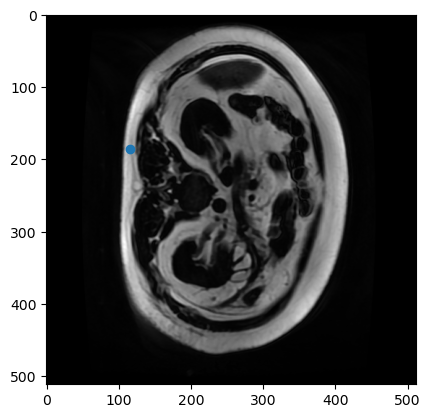

In [20]:
plt.imshow(img_get_fdata[:,:,15,1],'gray')
plt.scatter(116,186)

(array([[10., 15.,  4.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [10., 15.,  4.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 8., 16.,  3.,  2.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 8., 16.,  1.,  3.,  1.,  0.,  0.,  1.,  0.,  0.],
        [15.,  9.,  1.,  3.,  1.,  0.,  0.,  1.,  0.,  0.],
        [15.,  7.,  2.,  5.,  0.,  0.,  0.,  1.,  0.,  0.],
        [11.,  4., 10.,  3.,  1.,  0.,  1.,  0.,  0.,  0.],
        [ 7.,  5.,  7.,  7.,  3.,  1.,  0.,  0.,  0.,  0.],
        [ 8.,  8.,  6.,  3.,  4.,  1.,  0.,  0.,  0.,  0.],
        [11., 11.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
        [16.,  9.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 9., 14.,  6.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 9., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 9., 17.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [12., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [18., 10.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [16., 14.,  0.,  0.,  0.,  0.,  

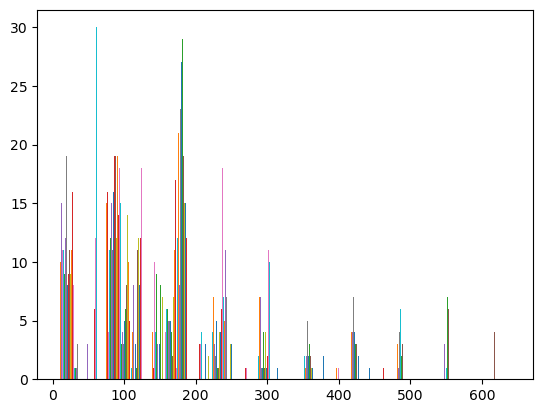

In [10]:
plt.hist(img_get_fdata[100:130,100:200,1,1])

Interactive to determine ROI

In [11]:
%matplotlib inline

def plot_img_nii(i_slice, i_bval,x_roi,y_roi):
    plt.imshow(img_get_fdata[:,:,i_slice,i_bval],'gray')
    plt.scatter(x_roi, y_roi)
    
    
interactive(plot_img_nii, 
            i_slice = (0,img_get_fdata.shape[2]-1),
            i_bval = (0,img_get_fdata.shape[3]-1),
            x_roi =(0,img_get_fdata.shape[0]-1),
            y_roi=(0,img_get_fdata.shape[1]-1))

interactive(children=(IntSlider(value=17, description='i_slice', max=35), IntSlider(value=0, description='i_bv…

In [12]:
num_bval = img_get_fdata.shape[3]
intensive_of_10b = np.zeros(num_bval)
for i_bval in range(img_get_fdata.shape[3]):
    print(i_bval)
    intensive_of_10b[i_bval] = img_get_fdata[116,186,15,i_bval]

0
1


In [13]:
num_bval = img_get_fdata.shape[3]
intensive_of_10b = np.zeros(num_bval)
for i_bval in range(img_get_fdata.shape[3]):
    # print(i_bval)
    intense_roi = np.sum(img_get_fdata[116-5:116+5,186-5:186+5,15,i_bval])/10
    # print(intense_roi.shape)
    intensive_of_10b[i_bval-9] = intense_roi
    
plt.scatter([0, 20, 50, 80, 150, 200, 500, 800, 1000, 1500],intensive_of_10b)

IndexError: index -9 is out of bounds for axis 0 with size 2

In [12]:
from dipy.reconst.ivim import IvimModel
from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti_data

In [13]:
fraw, fbval, fbvec = get_fnames('ivim')


In [14]:
# data = load_nifti_data(fraw)
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
# gtab = gradient_table(bvals, bvecs, b0_threshold=0)
# print('data.shape (%d, %d, %d, %d)' % data.shape)

In [15]:
ap_bvals = np.array([20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0])
ap_bvecs = bvecs[0:10,:]
gtab = gradient_table(ap_bvals,ap_bvecs, b0_threshold=0)
print('data.shape (%d, %d, %d, %d)' % img_get_fdata.shape)

data.shape (256, 256, 24, 10)


In [16]:
ivimmodel = IvimModel(gtab, fit_method='trr')

data_slice = img_get_fdata[:,:,15,:]
# data_slice = np.append(img_get_fdata[:,:,-1,:], img_get_fdata[:,:,0:15,:])
ivimfit = ivimmodel.fit(data_slice)

/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:153: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)
  0%|                                                                                                                                                                                           | 0/65536 [00:00<?, ?it/s]/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:383: RuntimeWarning: divide by zero encountered in log
  -np.log(data[self.gtab.bvals >=
/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:378: RuntimeWarning: divide by zero encountered in log
  -np.log(data[self.gtab.bvals <=
/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:436: UserWarning: x0 obtained from linear fitting is not feasible as initial guess for le

In [17]:
ivimparams = ivimfit.model_params 
print("ivimparams.shape : {}".format(ivimparams.shape))

ivimparams.shape : (256, 256, 4)


In [18]:
i, j = 116,186
estimated_params = ivimfit.model_params[i, j, :]
print(estimated_params)

[3.95393207e+02 2.68223520e-01 2.03114156e-03 1.04845300e-03]


In [19]:
def plot_map(raw_data, variable, limits, filename):
    fig, ax = plt.subplots(1)
    lower, upper = limits
    ax.set_title('Map for {}'.format(variable))
    im = ax.imshow(raw_data.T, origin='lower', clim=(lower, upper),
                   cmap="gray", interpolation='nearest')
    fig.colorbar(im)
    fig.savefig(filename)

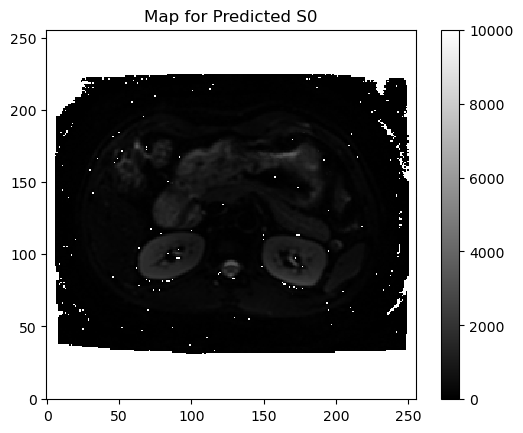

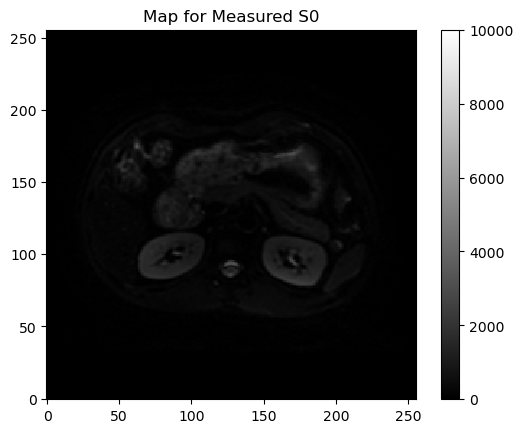

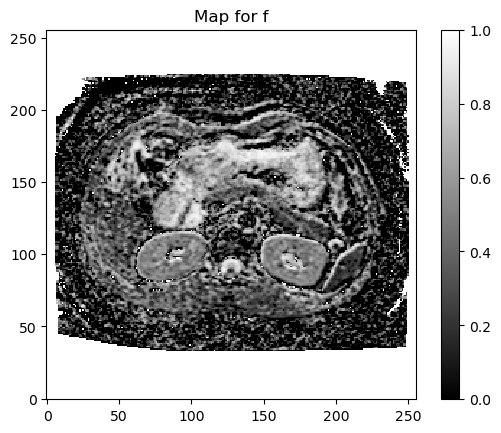

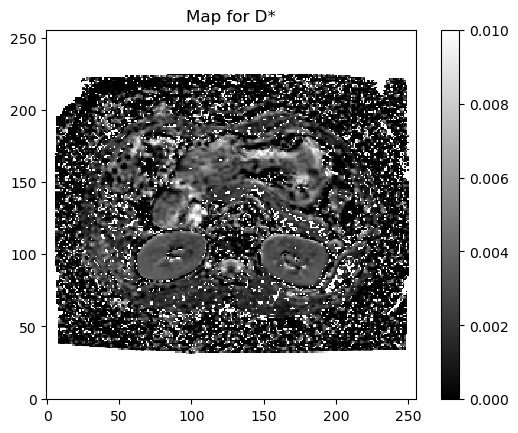

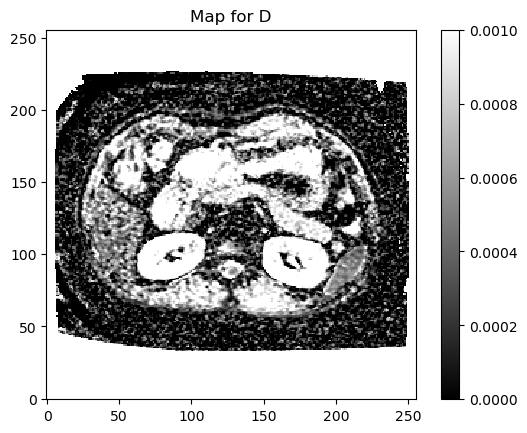

In [20]:
plot_map(ivimfit.S0_predicted, "Predicted S0", (0, 10000), "predicted_S0.png")
plot_map(data_slice[:, :, 0], "Measured S0", (0, 10000), "measured_S0.png")
plot_map(ivimfit.perfusion_fraction, "f", (0, 1), "perfusion_fraction.png")
plot_map(ivimfit.D_star, "D*", (0, 0.01), "perfusion_coeff.png")
plot_map(ivimfit.D, "D", (0, 0.001), "diffusion_coeff.png")

In [21]:
ivimmodel_vp = IvimModel(gtab, fit_method='VarPro', bounds=([0., 0., 0.,0.], [np.inf, 1., 1., 1.]))
ivimmodel_vp = IvimModel(gtab, fit_method='VarPro')
ivimfit_vp = ivimmodel_vp.fit(data_slice)

/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:159: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)
  0%|                                                                                                                                                                                           | 0/65536 [00:00<?, ?it/s]/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:595: RuntimeWarning: invalid value encountered in divide
  data = data / data_max


ValueError: `x0` is infeasible.

In [ ]:
i, j = 116,186
estimated_params = ivimfit.model_params[i, j, :]
print(estimated_params)

In [ ]:
fig, ax = plt.subplots(1)

ax.scatter(gtab.bvals, data_slice[i, j, :],
           color="green", label="Measured signal")

ivim_trr_predict = ivimfit.predict(gtab)[i, j, :]

ax.plot(np.append(0,gtab.bvals[:-1]), np.append(ivim_trr_predict[-1],ivim_trr_predict[:-1]), label="trr prediction")


S0_est, f_est, D_star_est, D_est = ivimfit.model_params[i, j, :]

text_fit = """trr param estimates: \n S0={:06.3f} f={:06.4f}\n
            D*={:06.5f} D={:06.5f}""".format(S0_est, f_est, D_star_est, D_est)

ax.text(0.65, 0.80, text_fit, horizontalalignment='center',
        verticalalignment='center', transform=plt.gca().transAxes)

ax.set_xlabel("bvalues")
ax.set_ylabel("Signals")


fig.legend(loc='upper right')
fig.savefig("ivim_voxel_plot.png")

In [ ]:
np.append(0,gtab.bvals[:-1])
np.append(ivim_trr_predict[-1],ivim_trr_predict[:-1])

In [68]:
data_slice = img_get_fdata[75:200,75:175,15,:]
data_slice_order = np.array(data_slice)

num_bval = img_get_fdata.shape[3]
for i_bval in range(img_get_fdata.shape[3]):
    data_slice_order[:,:,i_bval-9] = data_slice[:,:,i_bval]

def plot_img_nii(i_bval,x_roi,y_roi):
    plt.imshow(data_slice_order[:,:,i_bval],'gray')
    plt.colorbar()
    plt.scatter(x_roi, y_roi)
    
    
interactive(plot_img_nii, 
            i_bval = (0,data_slice_order.shape[2]-1),
            x_roi =(0,data_slice_order.shape[1]-1),
            y_roi=(0,data_slice_order.shape[0]-1))

interactive(children=(IntSlider(value=4, description='i_bval', max=9), IntSlider(value=49, description='x_roi'…

In [64]:
ap_bvals = np.array([0, 20, 50, 80, 150, 200, 500, 800, 1000, 1500])
ap_bvecs = bvecs[0:10,:]
gtab = gradient_table(ap_bvals,ap_bvecs, b0_threshold=0)
print('data.shape (%d, %d, %d, %d)' % img_get_fdata.shape)

data.shape (256, 256, 24, 10)


In [65]:
ivimmodel = IvimModel(gtab, fit_method='trr')
ivimfit = ivimmodel.fit(data_slice_order)

/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:153: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)
  0%|                                                                                                                                                                                           | 0/12500 [00:00<?, ?it/s]/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:436: UserWarning: x0 obtained from linear fitting is not feasible as initial guess for leastsq while estimating f and D_star. Using parameters from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:509: UserWarning: x0 is unfeasible for leastsq fitting. Returning x0 values from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/

In [66]:
ivimparams = ivimfit.model_params 
print("ivimparams.shape : {}".format(ivimparams.shape))

ivimparams.shape : (125, 100, 4)


In [71]:
i, j = 112, 42
estimated_params = ivimfit.model_params[i, j, :]
print(estimated_params)

[8.38733727e+02 2.85559822e-01 2.18887045e-03 9.34600995e-04]


In [72]:
def plot_map(raw_data, variable, limits, filename):
    fig, ax = plt.subplots(1)
    lower, upper = limits
    ax.set_title('Map for {}'.format(variable))
    im = ax.imshow(raw_data.T, origin='lower', clim=(lower, upper),
                   cmap="gray", interpolation='nearest')
    fig.colorbar(im)
    fig.savefig(filename)

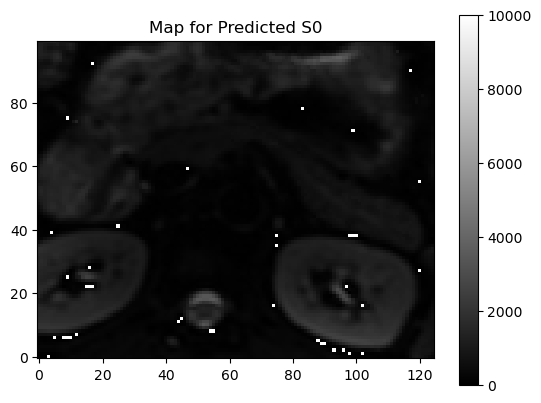

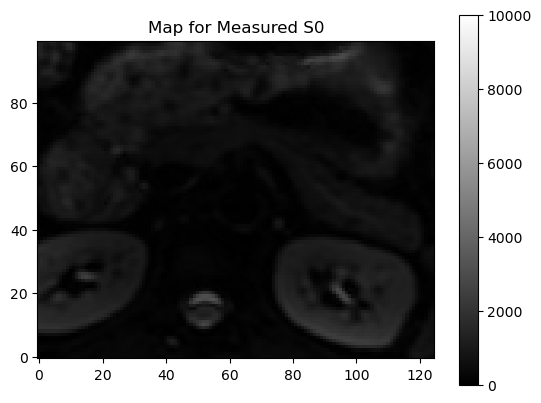

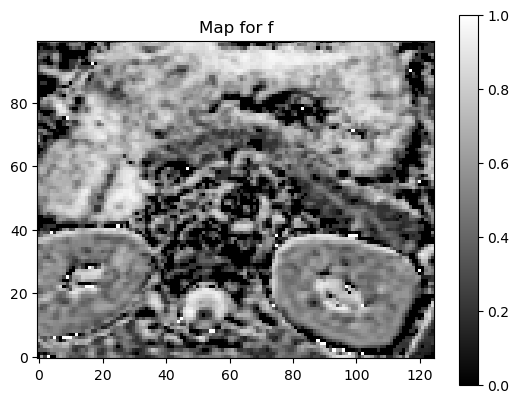

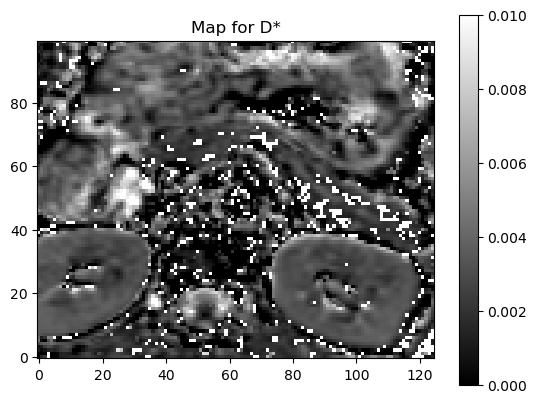

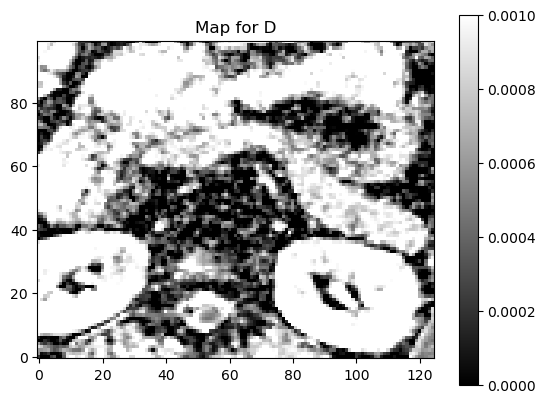

In [73]:
plot_map(ivimfit.S0_predicted, "Predicted S0", (0, 10000), "predicted_S0.png")
plot_map(data_slice[:, :, 0], "Measured S0", (0, 10000), "measured_S0.png")
plot_map(ivimfit.perfusion_fraction, "f", (0, 1), "perfusion_fraction.png")
plot_map(ivimfit.D_star, "D*", (0, 0.01), "perfusion_coeff.png")
plot_map(ivimfit.D, "D", (0, 0.001), "diffusion_coeff.png")